In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
bronx = pd.read_excel("/content/drive/MyDrive/Assignment 2/rollingsales_bronx.xlsx")

In [ ]:
brooklyn = pd.read_excel("/content/drive/MyDrive/Assignment 2/rollingsales_brooklyn.xlsx")

In [ ]:
manhattan = pd.read_excel("/content/drive/MyDrive/Assignment 2/rollingsales_manhattan.xlsx")

In [ ]:
queens = pd.read_excel('/content/drive/MyDrive/Assignment 2/rollingsales_queens.xlsx')

In [ ]:
statenisland = pd.read_excel('/content/drive/MyDrive/Assignment 2/rollingsales_statenisland.xlsx')

In [ ]:
frames = [bronx,brooklyn,manhattan,queens,statenisland]

In [ ]:
df = pd.concat(frames)

In [ ]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905.0,26.0,NaN,A9,1667 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,4750.0,3167.0,1899.0,1,A9,980000.0,2022-09-08
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3037.0,101.0,NaN,S0,443 EAST 180 STREET,NaN,...,1.0,2.0,3.0,1293.0,2820.0,1952.0,1,S0,720000.0,2022-02-23
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039.0,29.0,NaN,A5,2327 WASHINGTON AVE,NaN,...,1.0,0.0,1.0,1095.0,1260.0,1910.0,1,A5,499999.0,2022-04-28
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039.0,63.0,NaN,A1,469 EAST 185 STREET,NaN,...,1.0,0.0,1.0,1650.0,1296.0,1910.0,1,A1,599000.0,2022-05-17
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039.0,63.0,NaN,A1,469 EAST 185TH STREET,NaN,...,1.0,0.0,1.0,1650.0,1296.0,1910.0,1,A1,455000.0,2021-12-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355.0,78.0,NaN,B9,82 AMBASSADOR LANE,NaN,...,2.0,0.0,2.0,2360.0,2565.0,2001.0,1,B9,618000.0,2022-01-07
8859,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7267.0,200.0,NaN,V0,N/A CLAY PIT ROAD,NaN,...,0.0,0.0,0.0,68770.0,0.0,NaN,1,V0,1000.0,2021-10-22
8860,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349.0,37.0,NaN,V0,N/A ENGLEWOOD AVENUE,NaN,...,0.0,0.0,0.0,43800.0,0.0,NaN,1,V0,40000.0,2022-06-28
8861,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349.0,39.0,NaN,V0,N/A ENGLEWOOD AVENUE,NaN,...,0.0,0.0,0.0,8000.0,0.0,NaN,1,V0,2000.0,2021-12-29


## Check the null values are missing 

In [ ]:
df.isnull().any()
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                163
BLOCK                                 0
LOT                                   0
EASEMENT                          97650
BUILDING CLASS AT PRESENT           163
ADDRESS                               0
APARTMENT NUMBER                  72877
ZIP CODE                              4
RESIDENTIAL UNITS                 24118
COMMERCIAL UNITS                  42794
TOTAL UNITS                       20941
LAND SQUARE FEET                  45971
GROSS SQUARE FEET                 45970
YEAR BUILT                         7057
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

# We don't need EASEMENT and APARTMENT NUMBER 

In [ ]:
df.drop(["EASEMENT","APARTMENT NUMBER"],axis=1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97650 entries, 0 to 8862
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         97650 non-null  int64         
 1   NEIGHBORHOOD                    97650 non-null  object        
 2   BUILDING CLASS CATEGORY         97650 non-null  object        
 3   TAX CLASS AT PRESENT            97487 non-null  object        
 4   BLOCK                           97650 non-null  float64       
 5   LOT                             97650 non-null  float64       
 6   BUILDING CLASS AT PRESENT       97487 non-null  object        
 7   ADDRESS                         97650 non-null  object        
 8   ZIP CODE                        97646 non-null  float64       
 9   RESIDENTIAL UNITS               73532 non-null  float64       
 10  COMMERCIAL UNITS                54856 non-null  float64       
 11  TOT

In [ ]:
for col in ['TAX CLASS AT PRESENT']:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [ ]:
for col in ['BUILDING CLASS AT PRESENT']:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [ ]:
for col in ['RESIDENTIAL UNITS','ZIP CODE','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT']:
    df[col].fillna(df[col].median(), inplace = True)

In [ ]:
df.isnull().any()
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

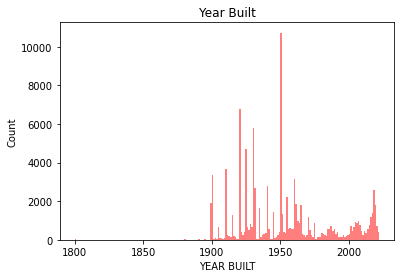

In [ ]:
num_bins =200
data_value = df["YEAR BUILT"]
plt.hist(data_value, num_bins, facecolor='red', alpha=0.5)
plt.xlabel("YEAR BUILT")
plt.ylabel("Count")
plt.title("Year Built")
plt.show()

In [ ]:
borough = {"BOROUGH":{"2":"Bronx", "1":"Manhattan","4":"Queens","3":"Brooklyn","5":"Statenisland"}}

In [ ]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)

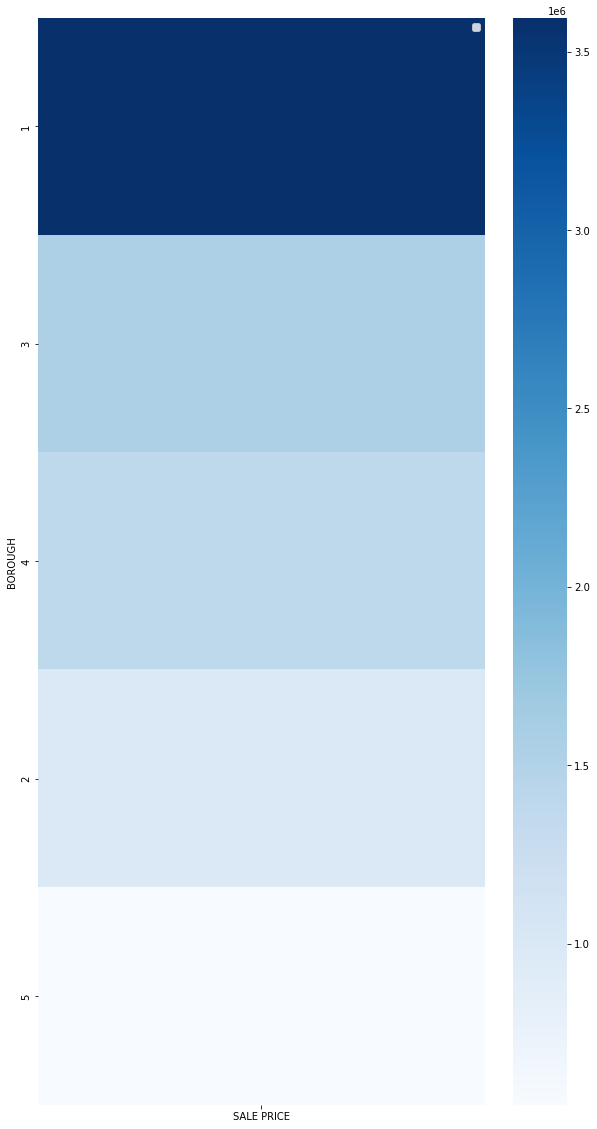

In [ ]:
pivot = pd.pivot_table(df,index=["BOROUGH"],values=["SALE PRICE"],
              aggfunc='mean').sort_values(by=['SALE PRICE'],ascending=False)
fig,ax=plt.subplots(figsize=(10,20))
sns.heatmap(pivot,cmap="Blues",ax=ax)
plt.legend(labels=["plot1", "plot2"])
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
yvalue = df.groupby('SALE DATE')['SALE PRICE'].mean()
fig = px.line(yvalue, x= yvalue.index, y=yvalue.values)

fig.update_layout(
    template = 'gridon',
    title = 'Average Sale Price across NYC',
    xaxis_title='Sale Year',
    yaxis_title='Sale Price',
    xaxis_showgrid = False,
    yaxis_showgrid = False
)

fig.show()


In [ ]:
yvalue = df.groupby('YEAR BUILT')['GROSS SQUARE FEET'].mean()
fig = px.line(yvalue, x= yvalue.index, y=yvalue.values)

fig.update_layout(
    template = 'plotly_white',
    title = 'Average SqFt across NYC',
    xaxis_title = 'Year Built',
    yaxis_title = 'Average SqFt',
    xaxis_showgrid = False,
    yaxis_showgrid = False
)

In [ ]:
dk = df.groupby('BOROUGH')

In [ ]:
dk.first()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
BOROUGH,,,,,,,,,,,,,,,,,,
1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377.00000,1.00000,S2,110 AVENUE C,10009.00000,2.00000,1.00000,3.00000,1502.00000,2790.00000,1901.00000,1,S2,2999999.00000,2022-09-15
2,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905.00000,26.00000,A9,1667 WASHINGTON AVENUE,10457.00000,1.00000,0.00000,1.00000,4750.00000,3167.00000,1899.00000,1,A9,980000.00000,2022-09-08
3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360.00000,56.00000,A5,30 BAY 10,11228.00000,1.00000,0.00000,1.00000,1546.00000,1428.00000,1930.00000,1,A5,75000.00000,2022-06-01
4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,949.00000,30.00000,A5,19-40 81ST SREET,11370.00000,1.00000,0.00000,1.00000,1800.00000,1224.00000,1945.00000,1,A5,935000.00000,2021-12-08
5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391.00000,7.00000,A5,4732 AMBOY ROAD,10312.00000,1.00000,0.00000,1.00000,3654.00000,910.00000,2002.00000,1,A5,764000.00000,2022-06-30


In [ ]:
value_manhattan = df.query("BOROUGH == 1")
value_bronx = df.query('BOROUGH == 2')
value_brooklyn = df.query('BOROUGH == 3')
value_queens = df.query('BOROUGH == 4')
value_staten = df.query('BOROUGH == 5')

In [ ]:
Manhattan_builds = value_manhattan.groupby('YEAR BUILT')['SALE PRICE'].mean()
bronx_builds = value_bronx.groupby('YEAR BUILT')['SALE PRICE'].mean()
brooklyn_builds = value_brooklyn.groupby('YEAR BUILT')['SALE PRICE'].mean()
queens_builds = value_queens.groupby('YEAR BUILT')['SALE PRICE'].mean()
staten_builds = value_staten.groupby('YEAR BUILT')['SALE PRICE'].mean()

In [ ]:
import plotly.graph_objs as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Manhattan_builds.index, y=Manhattan_builds.values,
                         mode='lines',
                         name ='Manhattan',
                         ))
fig.add_trace(go.Scatter(x=bronx_builds.index, y=bronx_builds.values,
                         mode='lines',
                         name='Bronx',
                         ))
fig.add_trace(go.Scatter(x=brooklyn_builds.index, y=brooklyn_builds.values,
                         mode='lines',
                         name='Brooklyn',
                         ))
fig.add_trace(go.Scatter(x=queens_builds.index, y=queens_builds.values,
                         mode='lines',
                         name='queen',
                         ))
fig.add_trace(go.Scatter(x=staten_builds.index, y=staten_builds.values,
                         mode='lines',
                         name='staten'))

fig.update_layout(
    template = 'gridon',
    title = 'Average Sale Price by Year Built by Borough',
    xaxis_title = 'Year',
    yaxis_title = 'Price',
    xaxis_showgrid=False,
    yaxis_showgrid= False,
    legend = dict(y=-.2, orientation='h'),
    shapes=[
        dict(
            type="rect",
            x0="2007",
            y0=0,
            x1="2009",
            y1=brooklyn_builds.values.max()*1.2,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
    dict(
            type="rect",
            x0="2000",
            y0=0,
            x1="2002",
            y1=brooklyn_builds.max()*1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
         dict(
            type="rect",
            x0="1955",
            y0=0,
            x1="1975",
            y1=brooklyn_builds.max()*1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )],
    annotations=[
            dict(text="The Great Recession", x='2007', y=brooklyn_builds.values.max()*1.2),
        dict(text="  Dot-Com Bubble", x='2001', y=brooklyn_builds.values.max()*1),
        dict(text="  Vietnam War", x='1955', y=brooklyn_builds.values.max()*1)])


In [ ]:
df["SALE DATE"].dt.year

0       2022
1       2022
2       2022
3       2022
4       2021
        ... 
8858    2022
8859    2021
8860    2022
8861    2021
8862    2022
Name: SALE DATE, Length: 97650, dtype: int64

In [ ]:
df["SALE DATE"].dt.month

0        9
1        2
2        4
3        5
4       12
        ..
8858     1
8859    10
8860     6
8861    12
8862     7
Name: SALE DATE, Length: 97650, dtype: int64

In [ ]:
df["SALE YEAR"] = df["SALE DATE"].dt.year
df["SALE Month"] = df["SALE DATE"].dt.month

In [ ]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,SALE Month
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905.00000,26.00000,A9,1667 WASHINGTON AVENUE,10457.00000,1.00000,...,1.00000,4750.00000,3167.00000,1899.00000,1,A9,980000.00000,2022-09-08,2022,9
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3037.00000,101.00000,S0,443 EAST 180 STREET,10457.00000,1.00000,...,3.00000,1293.00000,2820.00000,1952.00000,1,S0,720000.00000,2022-02-23,2022,2
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039.00000,29.00000,A5,2327 WASHINGTON AVE,10458.00000,1.00000,...,1.00000,1095.00000,1260.00000,1910.00000,1,A5,499999.00000,2022-04-28,2022,4
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039.00000,63.00000,A1,469 EAST 185 STREET,10458.00000,1.00000,...,1.00000,1650.00000,1296.00000,1910.00000,1,A1,599000.00000,2022-05-17,2022,5
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039.00000,63.00000,A1,469 EAST 185TH STREET,10458.00000,1.00000,...,1.00000,1650.00000,1296.00000,1910.00000,1,A1,455000.00000,2021-12-23,2021,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7355.00000,78.00000,B9,82 AMBASSADOR LANE,10309.00000,2.00000,...,2.00000,2360.00000,2565.00000,2001.00000,1,B9,618000.00000,2022-01-07,2022,1
8859,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7267.00000,200.00000,V0,N/A CLAY PIT ROAD,10309.00000,0.00000,...,0.00000,68770.00000,0.00000,1950.00000,1,V0,1000.00000,2021-10-22,2021,10
8860,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349.00000,37.00000,V0,N/A ENGLEWOOD AVENUE,10309.00000,0.00000,...,0.00000,43800.00000,0.00000,1950.00000,1,V0,40000.00000,2022-06-28,2022,6
8861,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349.00000,39.00000,V0,N/A ENGLEWOOD AVENUE,10309.00000,0.00000,...,0.00000,8000.00000,0.00000,1950.00000,1,V0,2000.00000,2021-12-29,2021,12


In [ ]:
Manhattan_builds_SY = value_manhattan.groupby('SALE YEAR')['SALE PRICE'].mean()
bronx_builds_SY = value_bronx.groupby('SALE YEAR')['SALE PRICE'].mean()
brooklyn_builds_SY = value_brooklyn.groupby('SALE YEAR')['SALE PRICE'].mean()
queens_builds_SY = value_queens.groupby('SALE YEAR')['SALE PRICE'].mean()
staten_builds_SY = value_staten.groupby('SALE YEAR')['SALE PRICE'].mean()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Manhattan_builds_SY.index, y=Manhattan_builds_SY.values,
                         mode='lines',
                         name ='Manhattan',
                         ))
fig.add_trace(go.Scatter(x=bronx_builds_SY.index, y=bronx_builds_SY.values,
                         mode='lines',
                         name='Bronx',
                         ))
fig.add_trace(go.Scatter(x=brooklyn_builds_SY.index, y=brooklyn_builds_SY.values,
                         mode='lines',
                         name='Brooklyn',
                         ))
fig.add_trace(go.Scatter(x=queens_builds_SY.index, y=queens_builds_SY.values,
                         mode='lines',
                         name='queen',
                         ))
fig.add_trace(go.Scatter(x=staten_builds_SY.index, y=staten_builds_SY.values,
                         mode='lines',
                         name='staten'))

fig.update_layout(
    template = 'gridon',
    title = 'Average Sale Price by SALE YEAR by Borough',
    xaxis_title = 'Year',
    yaxis_title = 'Price',
    xaxis_showgrid=False,
    yaxis_showgrid= False,
    )

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.6 MB/s 
     |████████████████████████████████| 6.3 MB 50.4 MB/s 
     |████████████████████████████████| 16.7 MB 48.3 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
gdf_co = gpd.read_file('/content/drive/MyDrive/Assignment 2/map/MODZCTA_2010.shp')

In [ ]:
gdf_co.head()

,MODZCTA,label,geometry
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21..."
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19..."
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20..."
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958...."
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19..."


In [ ]:
gdf = gdf_co.astype({'MODZCTA': 'int64'})

In [ ]:
df_merge_zcta = gdf.merge(df,right_on = 'ZIP CODE', left_on = 'MODZCTA')

In [ ]:
df_merge_zcta.head()

,MODZCTA,label,geometry,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,SALE Month
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",1,CHELSEA,01 ONE FAMILY DWELLINGS,1,722.00000,72.00000,A9,...,1.00000,1626.00000,3721.00000,1910.00000,1,A9,0.00000,2022-03-10,2022,3
1,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",1,CHELSEA,01 ONE FAMILY DWELLINGS,1,774.00000,81.00000,A4,...,1.00000,937.00000,2607.00000,1900.00000,1,A4,5300000.00000,2022-03-31,2022,3
2,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",1,CHELSEA,03 THREE FAMILY DWELLINGS,1,722.00000,66.00000,C0,...,3.00000,1925.00000,2666.00000,1900.00000,1,C0,3975000.00000,2022-03-10,2022,3
3,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",1,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,722.00000,46.00000,C6,...,1.00000,2500.00000,1988.00000,1910.00000,2,C6,299000.00000,2021-11-01,2021,11
4,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",1,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,722.00000,46.00000,C6,...,1.00000,2500.00000,1988.00000,1910.00000,2,C6,360000.00000,2021-12-13,2021,12


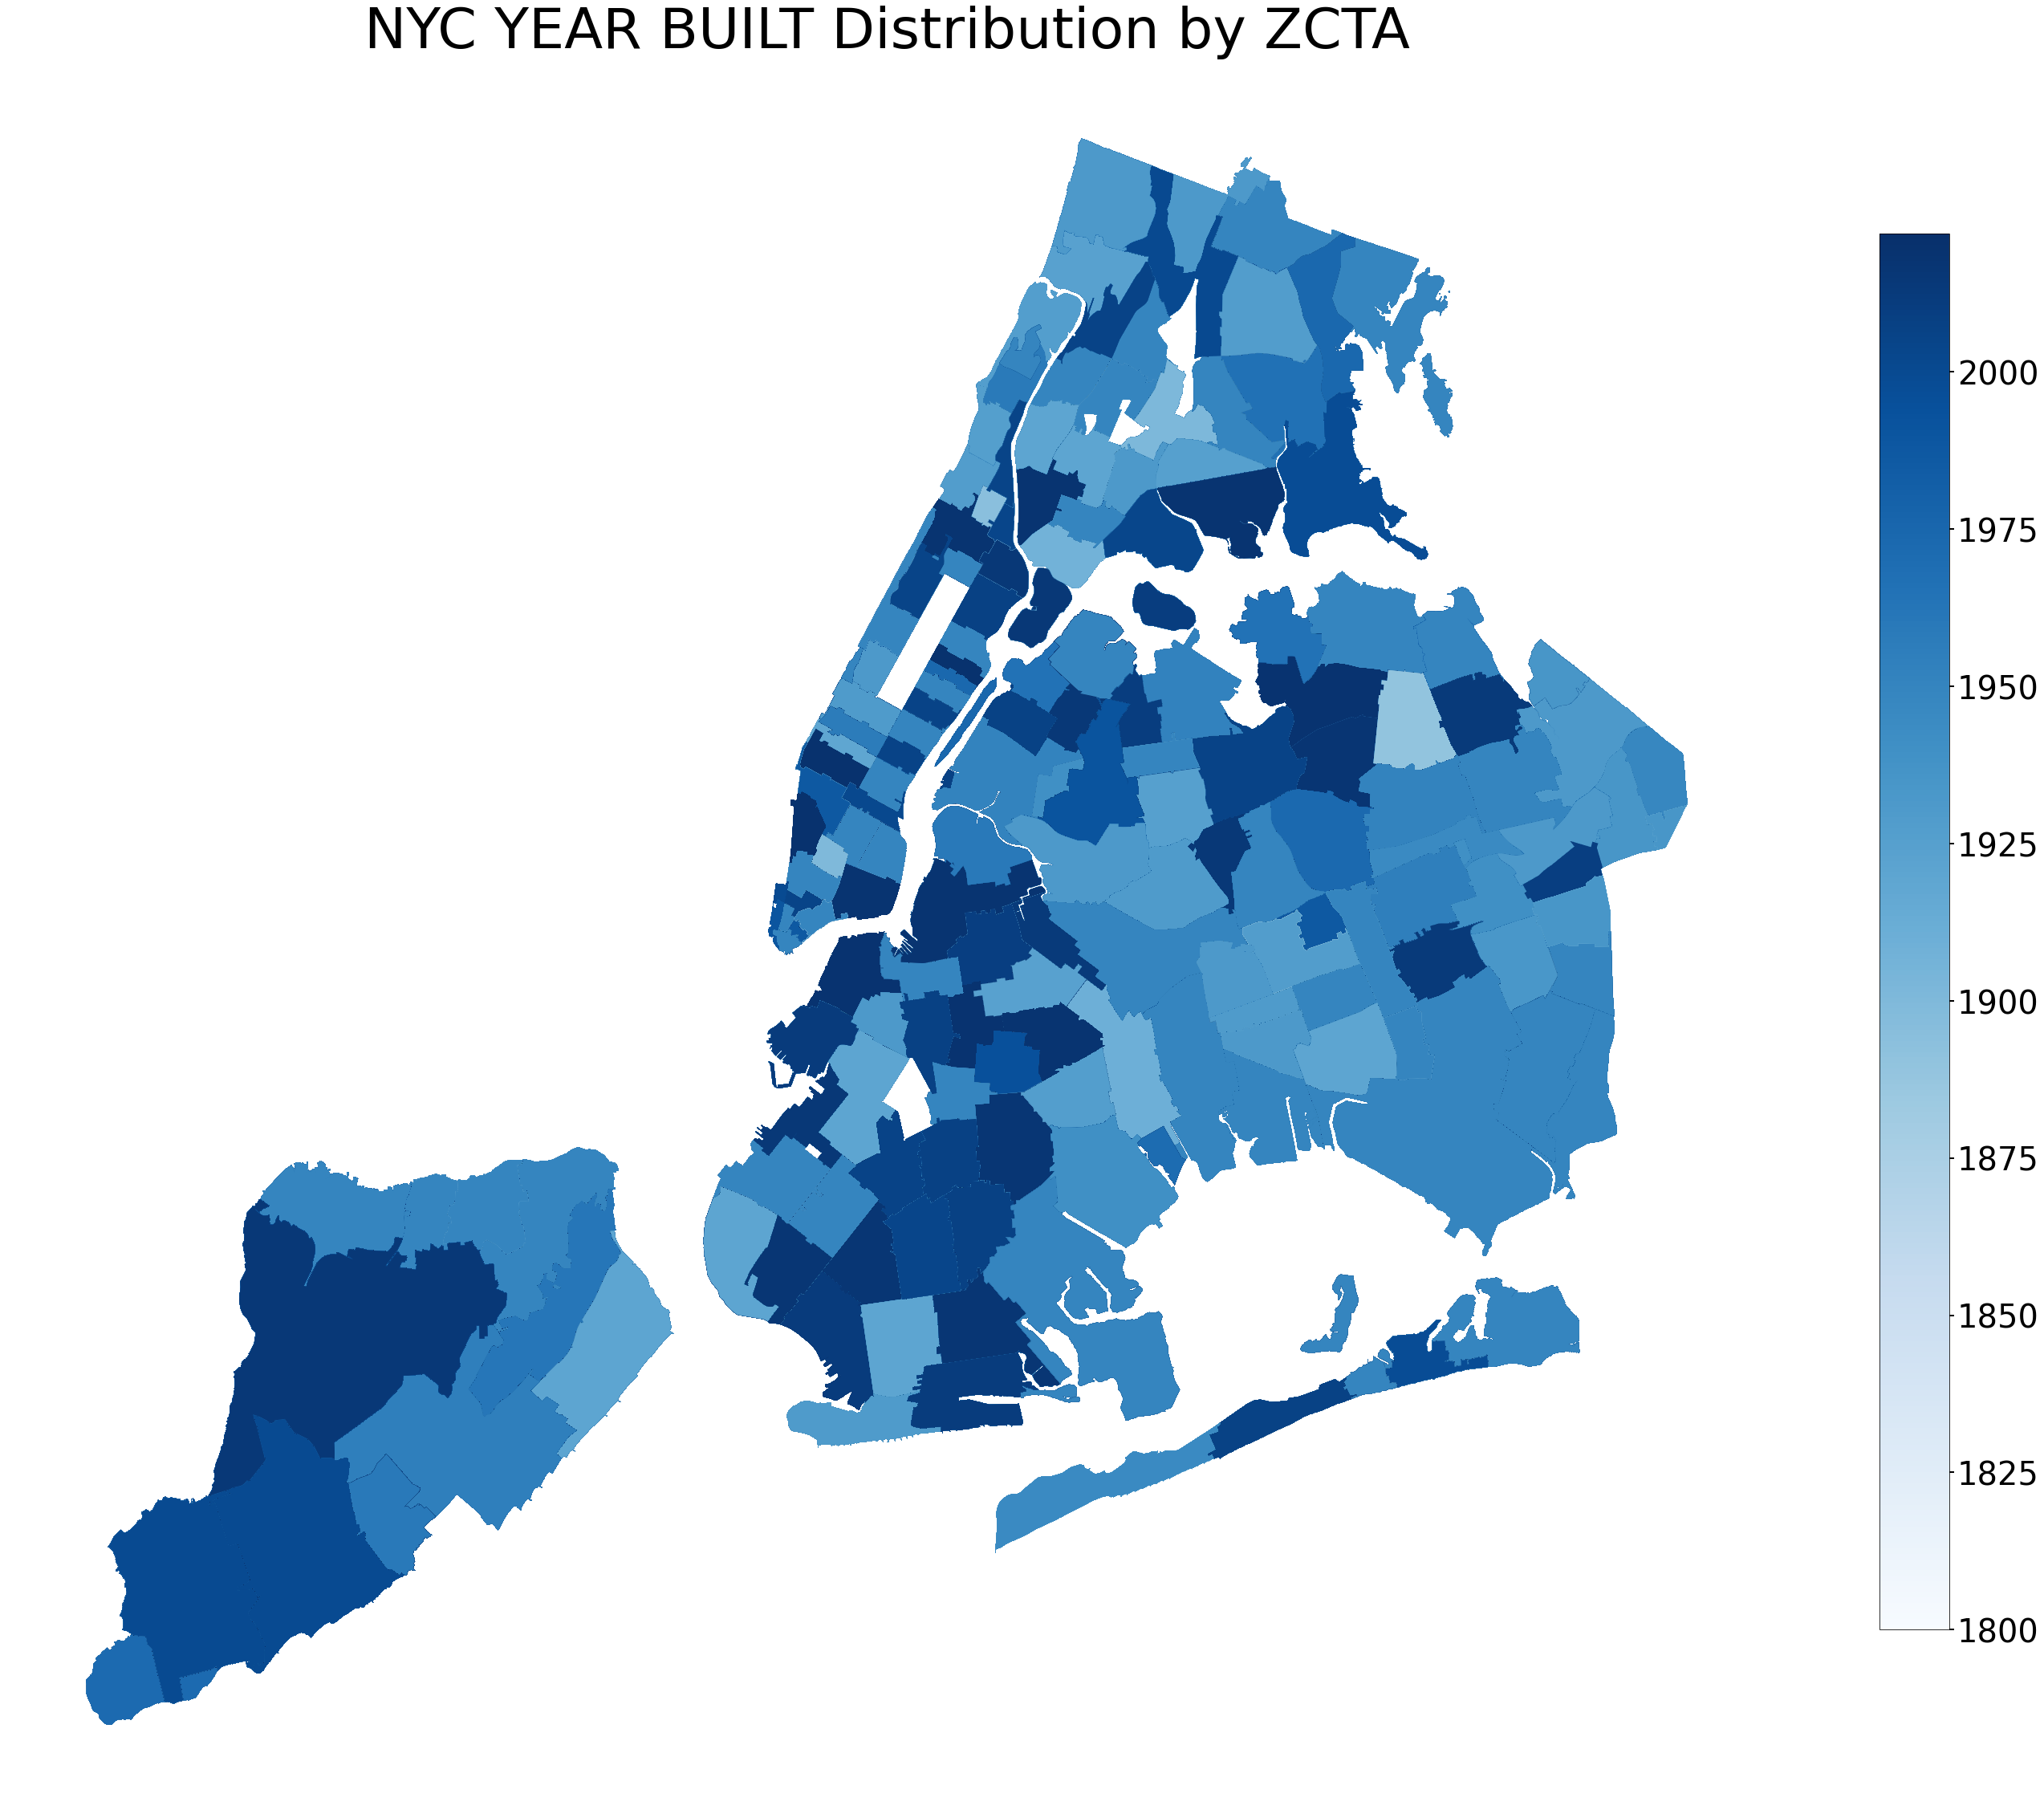

In [ ]:
fig,ax = plt.subplots(figsize= (50,40))

ax = df_merge_zcta.plot(column = 'YEAR BUILT',
                        cmap='Blues', ax=ax,
                        legend = True,
                        legend_kwds={'shrink':0.8})
cb_ax = fig.axes[1]

cb_ax.tick_params(
    labelsize = 40,
    direction = 'out',
    length = 6,
    width = 2,
    grid_alpha =1
)

ax.set_title("NYC YEAR BUILT Distribution by ZCTA", fontdict={'fontsize':70}, loc='center')

ax.set_axis_off()


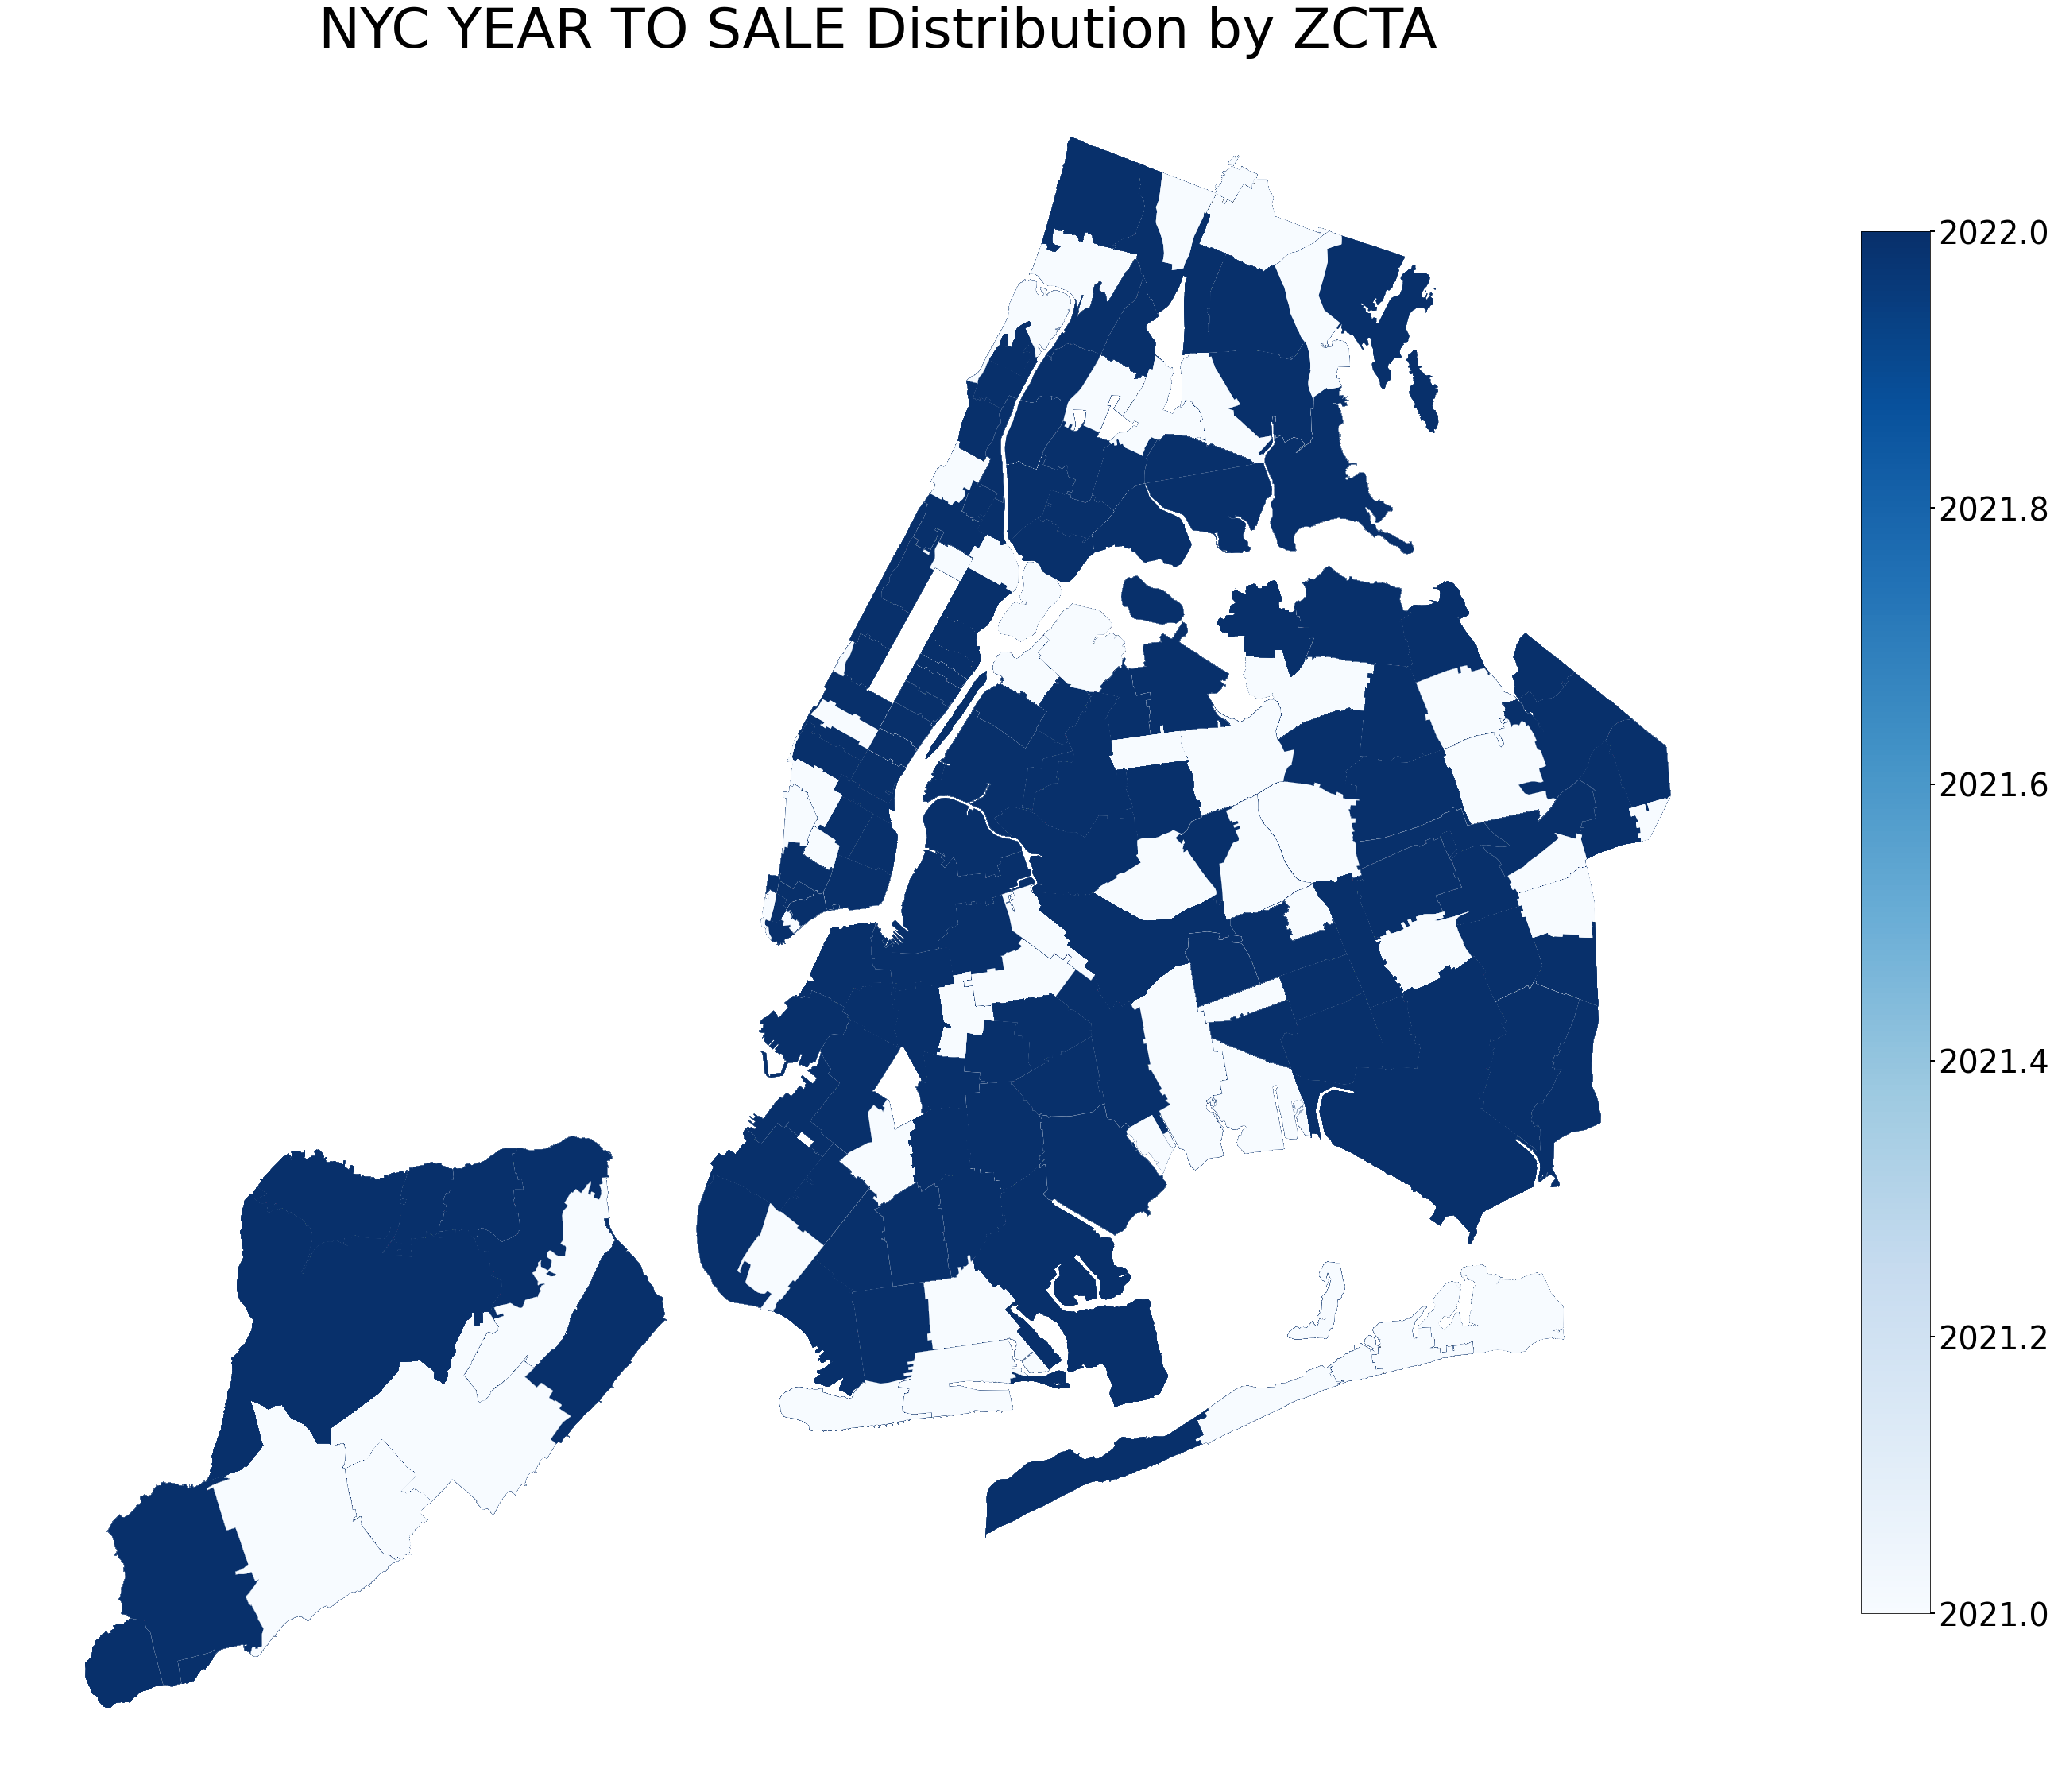

In [ ]:
fig,ax = plt.subplots(figsize= (50,40))

ax = df_merge_zcta.plot(column = 'SALE YEAR',
                        cmap='Blues', ax=ax,
                        legend = True,
                        legend_kwds={'shrink':0.8})
cb_ax = fig.axes[1]

cb_ax.tick_params(
    labelsize = 40,
    direction = 'out',
    length = 6,
    width = 2,
    grid_alpha =1
)

ax.set_title("NYC YEAR TO SALE Distribution by ZCTA", fontdict={'fontsize':70}, loc='center')

ax.set_axis_off()


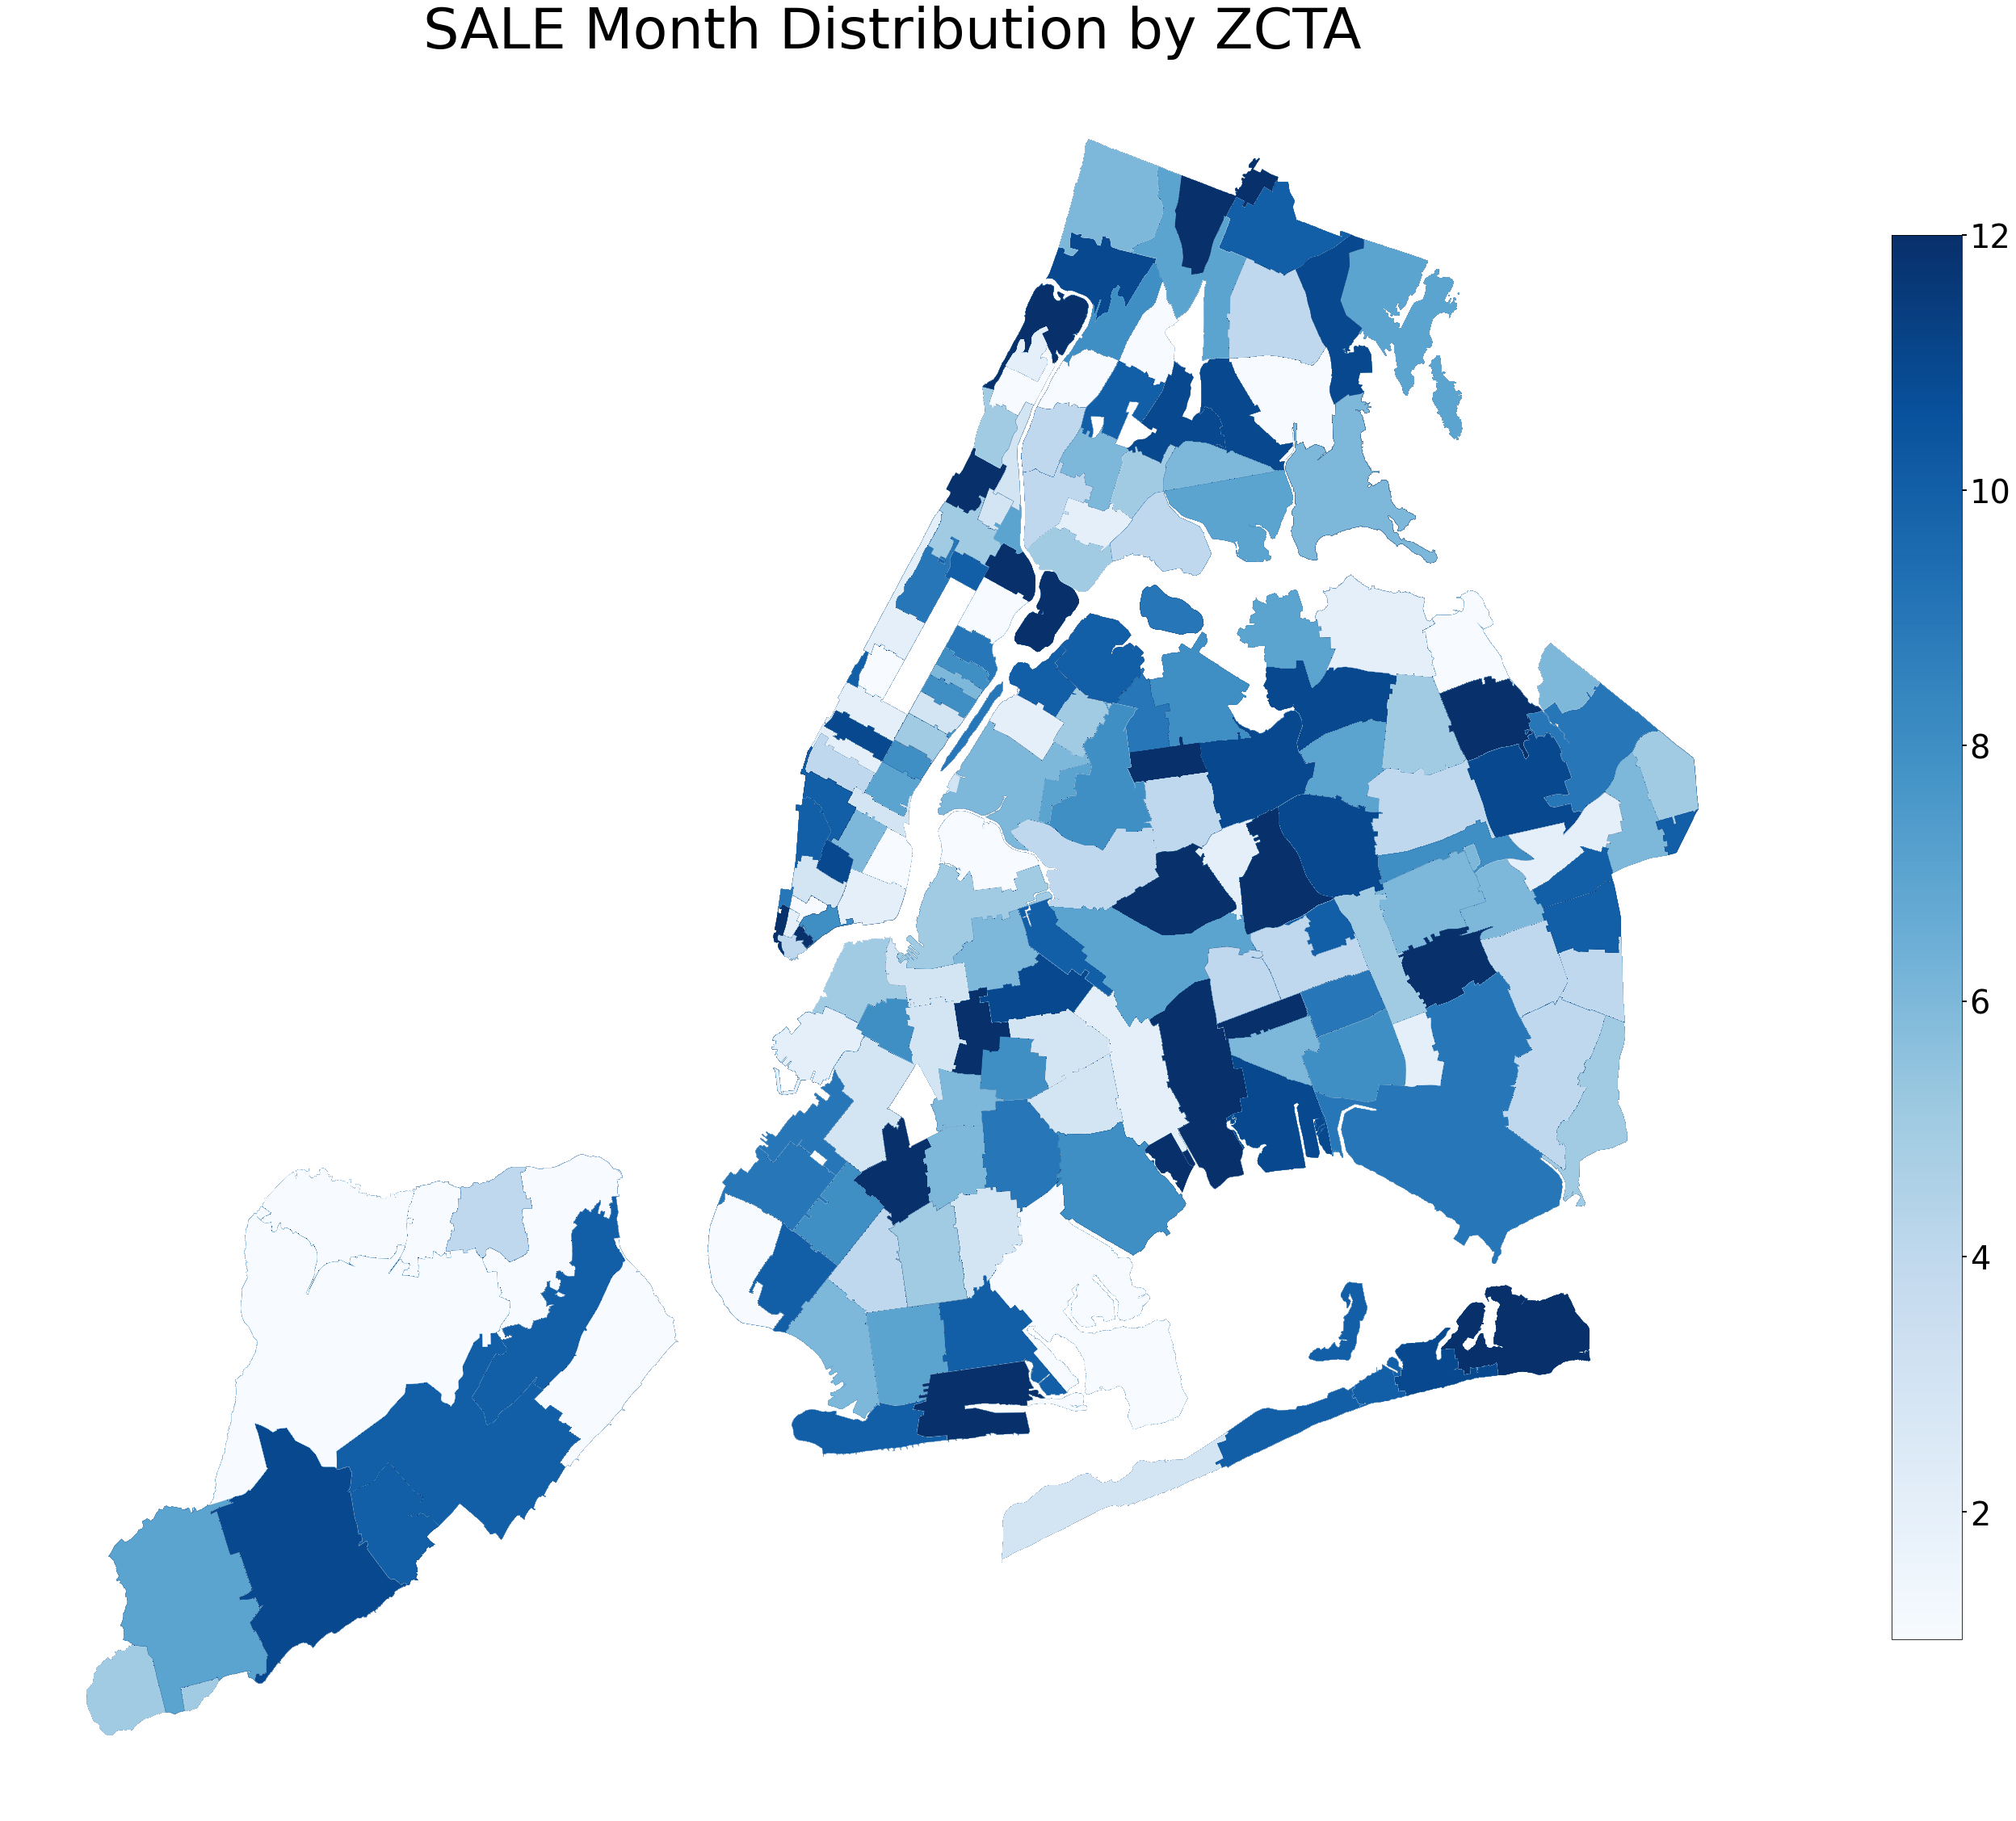

In [ ]:
fig,ax = plt.subplots(figsize= (50,40))

ax = df_merge_zcta.plot(column = 'SALE Month',
                        cmap='Blues', ax=ax,
                        legend = True,
                        legend_kwds={'shrink':0.8})
cb_ax = fig.axes[1]

cb_ax.tick_params(
    labelsize = 40,
    direction = 'out',
    length = 6,
    width = 2,
    grid_alpha =1
)

ax.set_title("SALE Month Distribution by ZCTA", fontdict={'fontsize':70}, loc='center')

ax.set_axis_off()


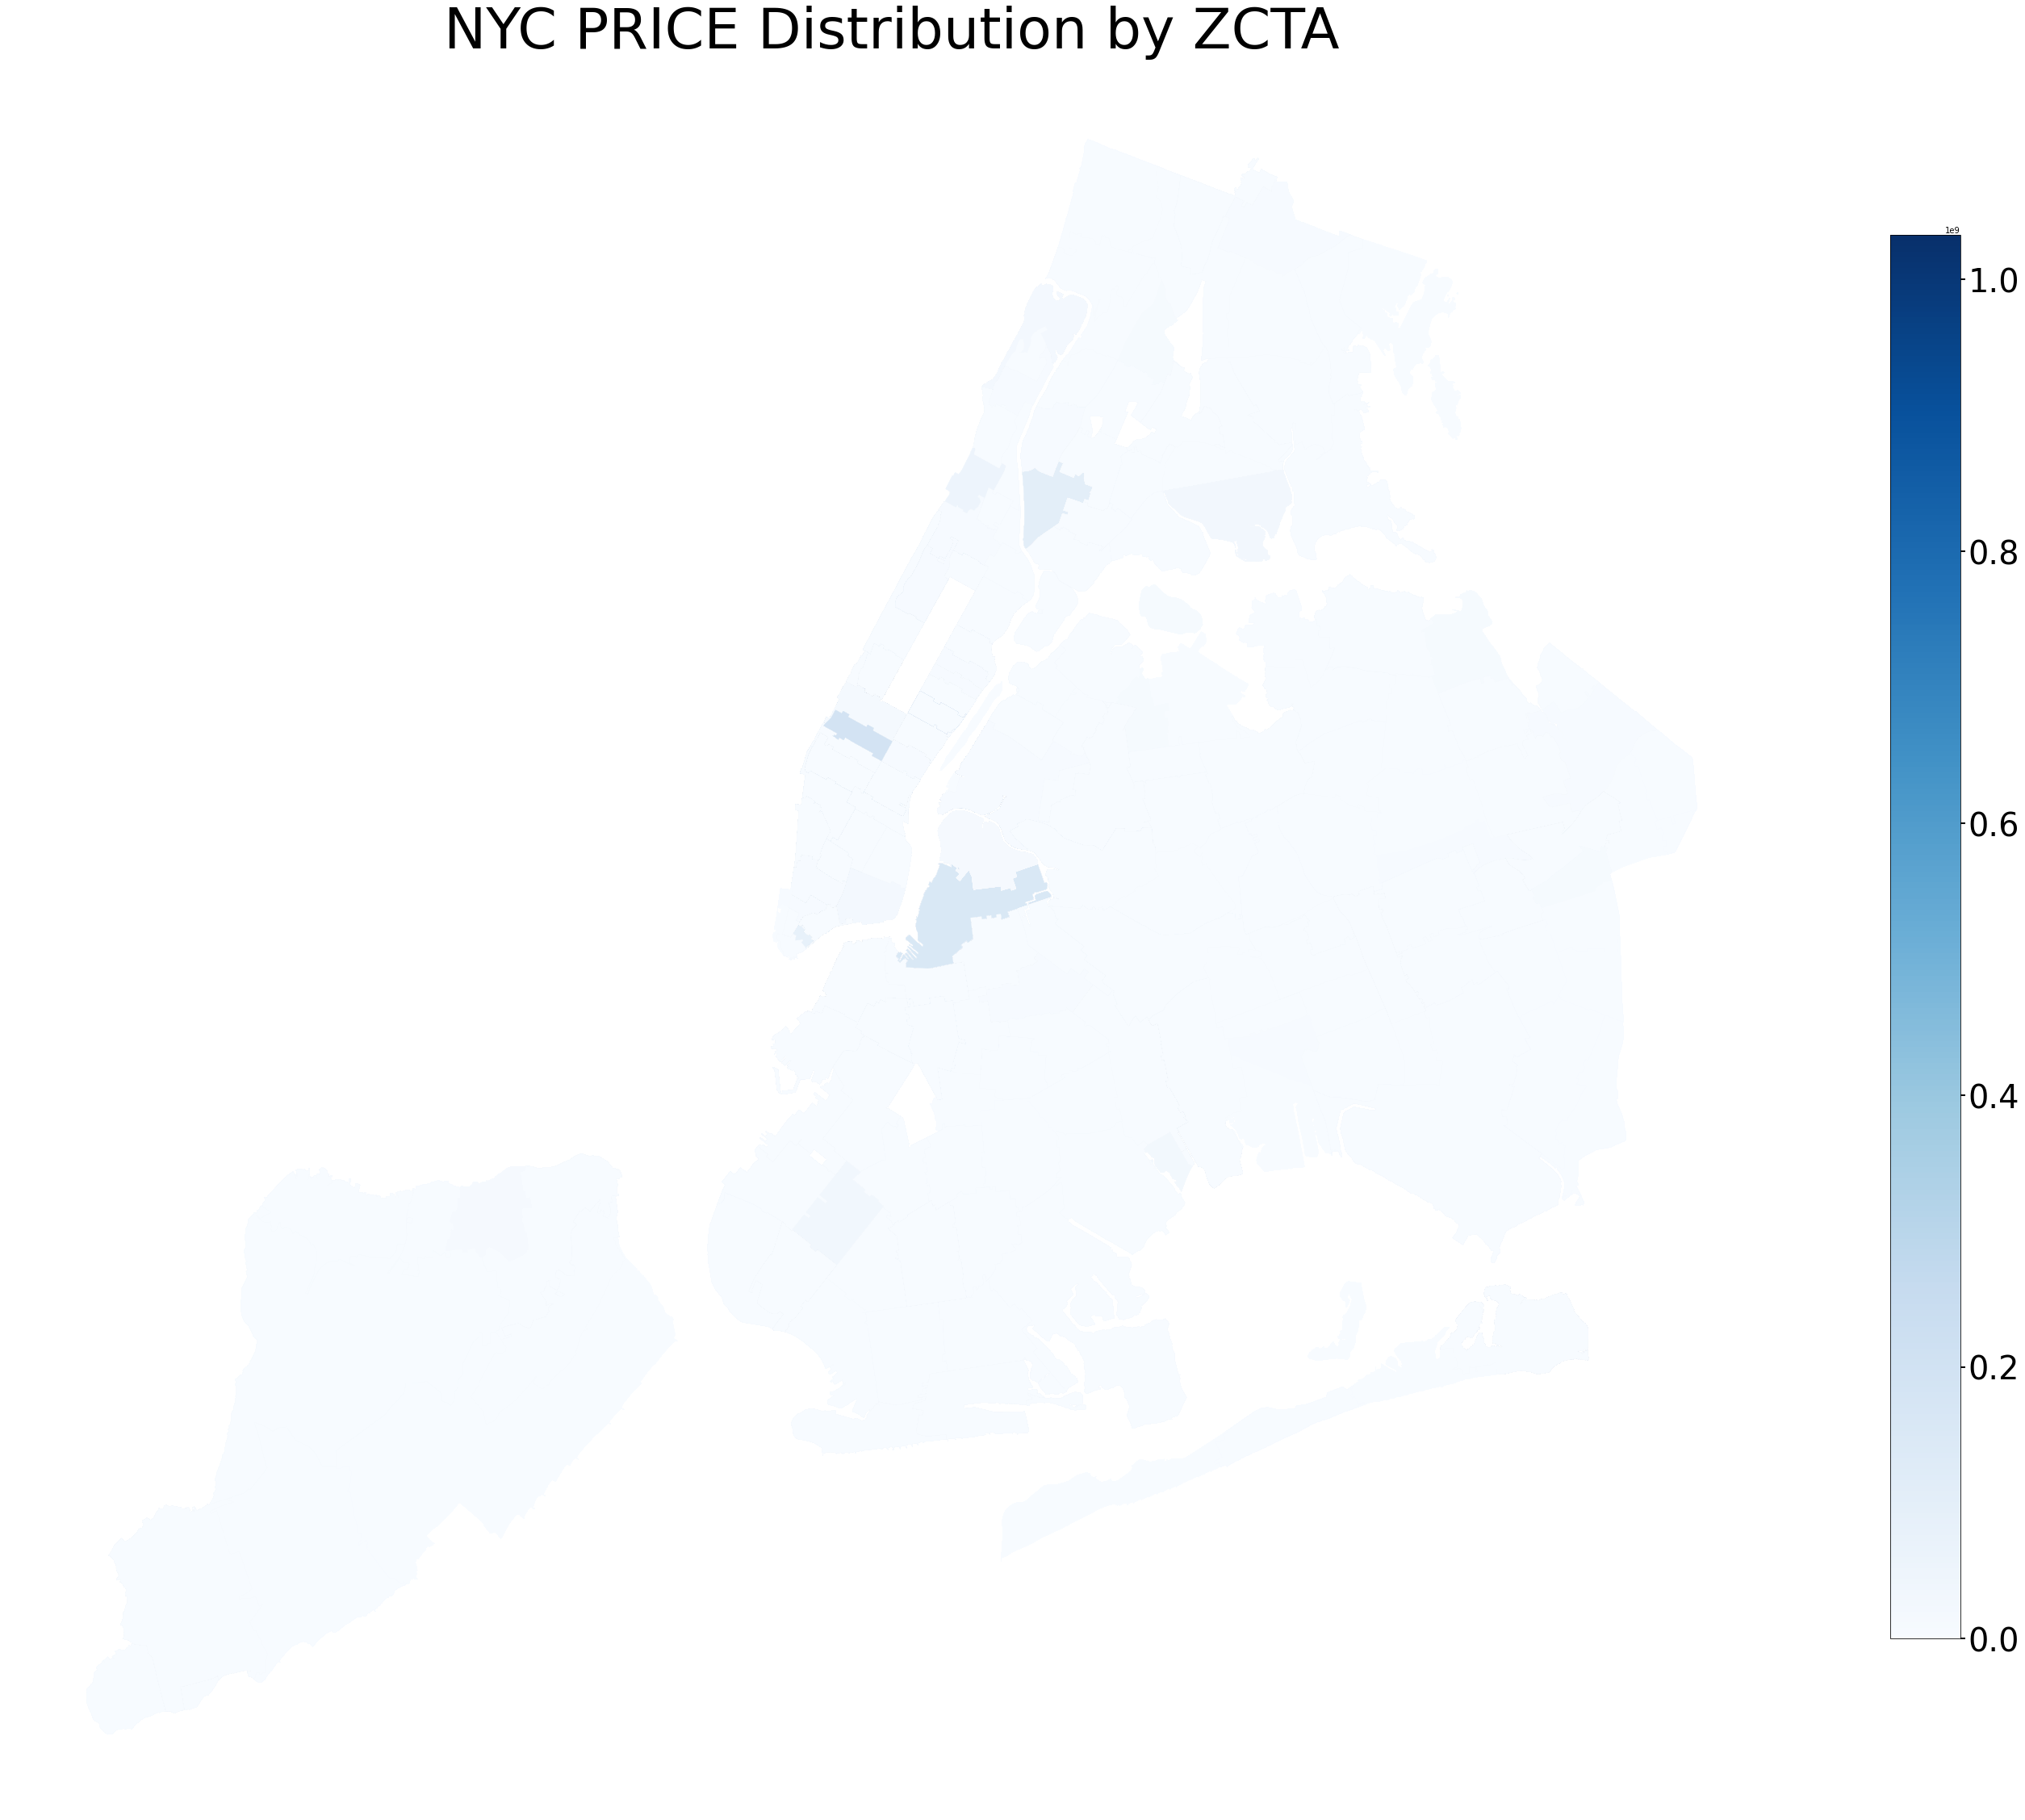

In [ ]:
fig,ax = plt.subplots(figsize= (50,40))

ax = df_merge_zcta.plot(column = 'SALE PRICE',
                        cmap='Blues', ax=ax,
                        legend = True,
                        legend_kwds={'shrink':0.8})
cb_ax = fig.axes[1]

cb_ax.tick_params(
    labelsize = 40,
    direction = 'out',
    length = 6,
    width = 2,
    grid_alpha =1
)

ax.set_title("NYC PRICE Distribution by ZCTA", fontdict={'fontsize':70}, loc='center')

ax.set_axis_off()
